In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,123):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(4305, 100, 100, 3)

In [3]:
Xtest.shape

(246, 100, 100, 3)

In [4]:
ytrain.shape

(4305,)

In [5]:
ytest.shape

(246,)

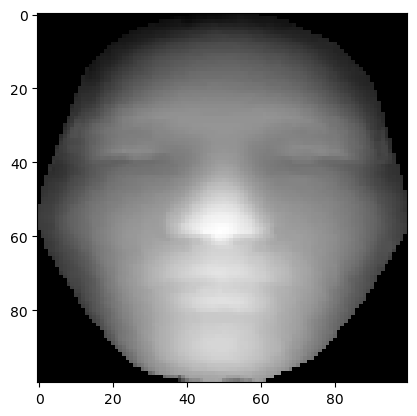

In [6]:
plt.imshow(Xtrain[4304])

In [7]:
ytrain[4304]

122

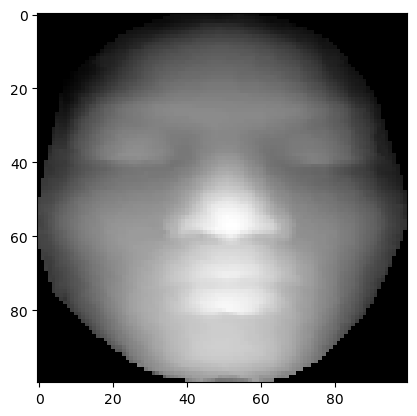

In [8]:
plt.imshow(Xtrain[245])

In [9]:
ytest[245]

122

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import Xception

In [23]:
base_model=Xception(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

83683744/83683744 [==============================] - 9s 0us/step


In [24]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [25]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(123,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 250)               4608250   
                                                                 
 dense_5 (Dense)             (None, 123)               30873     
                                                                 
Total params: 25500603 (97.28 MB)
Trainable params: 10135443 (38.66 MB)
Non-trainable params: 15365160 (58.61 MB)
_________________________________________________________________


In [26]:
model.fit(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

Epoch 1/10
135/135 [==============================] - 71s 502ms/step - loss: 4.4431 - accuracy: 0.0671 - val_loss: 3.9484 - val_accuracy: 0.1138
Epoch 2/10
135/135 [==============================] - 68s 503ms/step - loss: 2.4842 - accuracy: 0.4074 - val_loss: 2.3351 - val_accuracy: 0.3821
Epoch 3/10
135/135 [==============================] - 67s 499ms/step - loss: 1.3987 - accuracy: 0.6455 - val_loss: 1.4869 - val_accuracy: 0.6748
Epoch 4/10
135/135 [==============================] - 67s 499ms/step - loss: 0.9324 - accuracy: 0.7561 - val_loss: 1.1845 - val_accuracy: 0.6992
Epoch 5/10
135/135 [==============================] - 67s 494ms/step - loss: 0.6257 - accuracy: 0.8302 - val_loss: 0.8670 - val_accuracy: 0.7805
Epoch 6/10
135/135 [==============================] - 67s 493ms/step - loss: 0.4443 - accuracy: 0.8718 - val_loss: 0.6100 - val_accuracy: 0.8943
Epoch 7/10
135/135 [==============================] - 67s 497ms/step - loss: 0.3219 - accuracy: 0.9092 - val_loss: 0.6248 - val_ac

In [27]:
yprob=model.predict(Xtest)
yprob.shape

8/8 [==============================] - 3s 302ms/step


(246, 123)

In [28]:
ypred=yprob.argmax(axis=1)
ypred.shape

(246,)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       0.33      1.00      0.50         2
           4       0.67      1.00      0.80         2
           5       0.50      1.00      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       0.67    

C:\Users\PRISM WHITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRISM WHITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRISM WHITE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

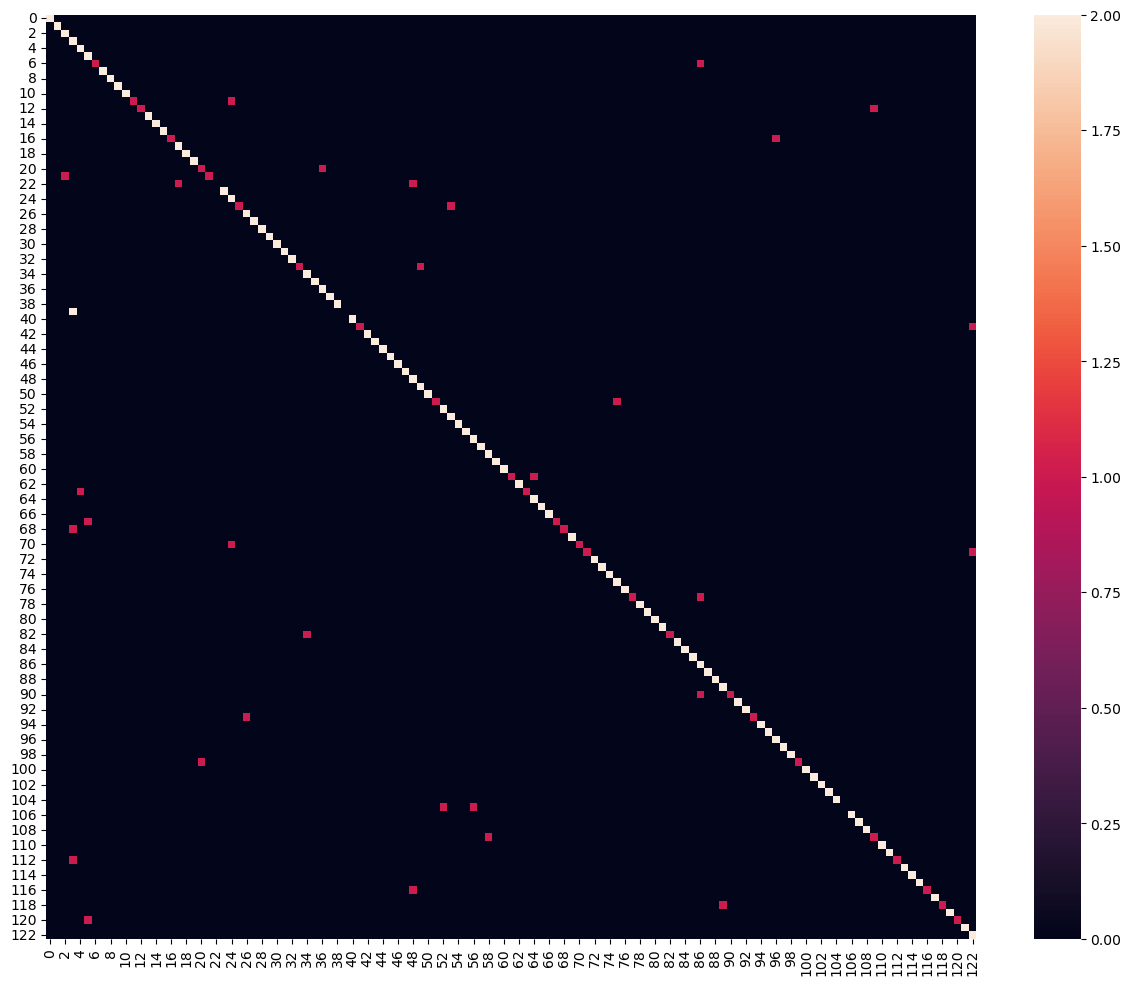

In [30]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()